<a href="https://colab.research.google.com/github/DarthVader326/new.website/blob/master/FirstAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf 

Importing Data


In [69]:
nb_classes = 10
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
print("X-train original shape", X_train.shape)
print("Y-train original shape", Y_train.shape)

X-train original shape (60000, 28, 28)
Y-train original shape (60000,)


See Data

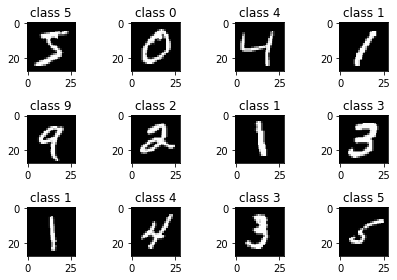

In [70]:
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("class {}".format(Y_train[i]))
plt.tight_layout()

In [71]:
print(X_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Reshape Data

In [72]:
X_train= X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [73]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [74]:
print("training matrix shape", X_train.shape)
print("test matrix shape", X_test.shape)

training matrix shape (60000, 784)
test matrix shape (10000, 784)


Format Y Data

In [75]:
Y_train = tf.keras.utils.to_categorical(Y_train, nb_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, nb_classes)

In [76]:
print(X_train[0])
print(Y_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

Create nurel network

In [77]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(512, input_shape=(784,)),
                             tf.keras.layers.Activation('relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Activation('softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
model.fit(X_train, Y_train,
          batch_size= 128, epochs=4, verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/4
469/469 [==============================] - 5s 9ms/step - loss: 0.4862 - accuracy: 0.8607 - val_loss: 0.1377 - val_accuracy: 0.9591
Epoch 2/4
469/469 [==============================] - 4s 9ms/step - loss: 0.1292 - accuracy: 0.9624 - val_loss: 0.0980 - val_accuracy: 0.9701
Epoch 3/4
469/469 [==============================] - 4s 9ms/step - loss: 0.0874 - accuracy: 0.9741 - val_loss: 0.0794 - val_accuracy: 0.9748
Epoch 4/4
469/469 [==============================] - 4s 9ms/step - loss: 0.0626 - accuracy: 0.9811 - val_loss: 0.0734 - val_accuracy: 0.9778


In [80]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
print('test score:', score[0])
print('test accuracy:', score[1])

[0.07341880351305008, 0.9778000116348267]
test score: 0.07341880351305008
test accuracy: 0.9778000116348267


In [81]:
predictions = model.predict(X_test)
print(Y_train[1])
print(predictions[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.3314879e-07 6.4140238e-08 3.7800204e-05 2.6491459e-04 1.5903728e-09
 1.9442294e-07 5.0201399e-11 9.9969006e-01 1.8841469e-06 4.8053762e-06]


In [82]:
predicted_classes = np.argmax(predictions, axis=-1)
Y_test = np.argmax(Y_test, axis=-1)
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]



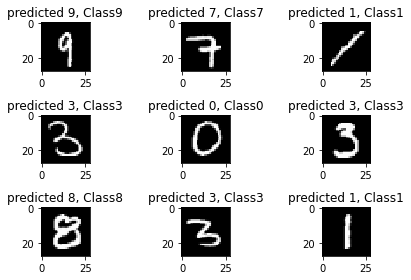

In [83]:
plt.figure()
point = 512
for i, correct in enumerate(correct_indices[point:point+9]):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[correct].reshape(28,28),cmap='gray', interpolation='none')
  plt.title('predicted {}, Class{}'.format(predicted_classes[correct], Y_test[correct]))
plt.tight_layout()



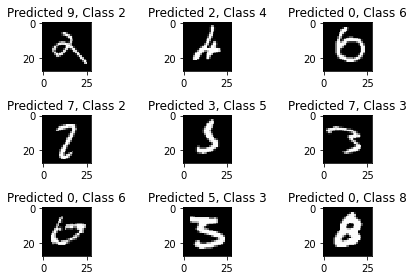

In [84]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect]))

plt.tight_layout()
